In [149]:
# Config Data Structure
import pandas as pd
import numpy as np
import pprint as pp
import random as ran
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from collections import Counter
from datetime import datetime as dt
from pymongo import MongoClient as mc

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

mongo_uri = "mongodb://localhost:27017"
client = mc(mongo_uri)
keti_db = client.keti_pattern_recognition

household_col = keti_db.household_info
cluster_col = keti_db.cluster_info
weather_col = keti_db.weather_info

In [150]:
uid = "아파트4-103-106"

# TimeSlot In
hh_db_datas = household_col.find_one({"uid": uid})
hh_db_datas

hh_datas = pd.DataFrame(columns=['Date Time', 'kw (15min)', 'ta (avg)', 'rhm (avg)'])
timeslot = hh_db_datas['timeslot']

In [151]:
wt_db_datas = weather_col.find()
wt_datas = pd.DataFrame()

for wt in wt_db_datas:
    tmp = pd.DataFrame()
    tmp['date'] = [wt['date']]
    tmp['avg_ta'] = float(wt['avgTa'])
    tmp['avg_rhm'] = float(wt['avgRhm'])
    
    wt_datas = pd.concat([wt_datas, tmp])
    
avg_ta = reduce(lambda acc,cur: acc + [cur for i in range(0,96)], wt_datas['avg_ta'], [])
avg_rhm = reduce(lambda acc,cur: acc + [cur for i in range(0,96)], wt_datas['avg_rhm'], [])

In [152]:
hh_datas['Date Time'] = [ts['time'] for ts in timeslot]
hh_datas['kw (15min)'] = [ts['power'] for ts in timeslot]
hh_datas['ta (avg)'] = avg_ta
hh_datas['rhm (avg)'] = avg_rhm

hh_datas = hh_datas[0::4]
date_time = pd.to_datetime(hh_datas.pop('Date Time'), format="%Y-%m-%d T%H:%M Z")

hh_datas

,kw (15min),ta (avg),rhm (avg)
0,0.099,20.4,72.8
4,0.105,20.4,72.8
8,0.094,20.4,72.8
12,0.094,20.4,72.8
16,0.086,20.4,72.8
...,...,...,...
35020,0.116,15.5,52.8
35024,0.045,15.5,52.8
35028,0.050,15.5,52.8
35032,0.030,15.5,52.8


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


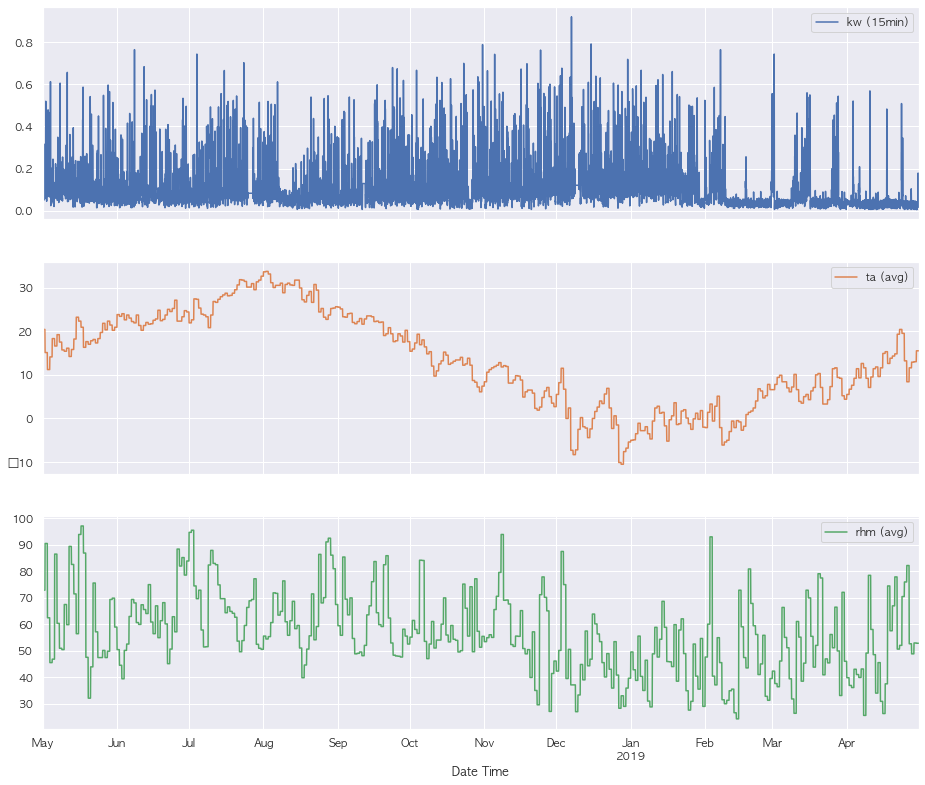

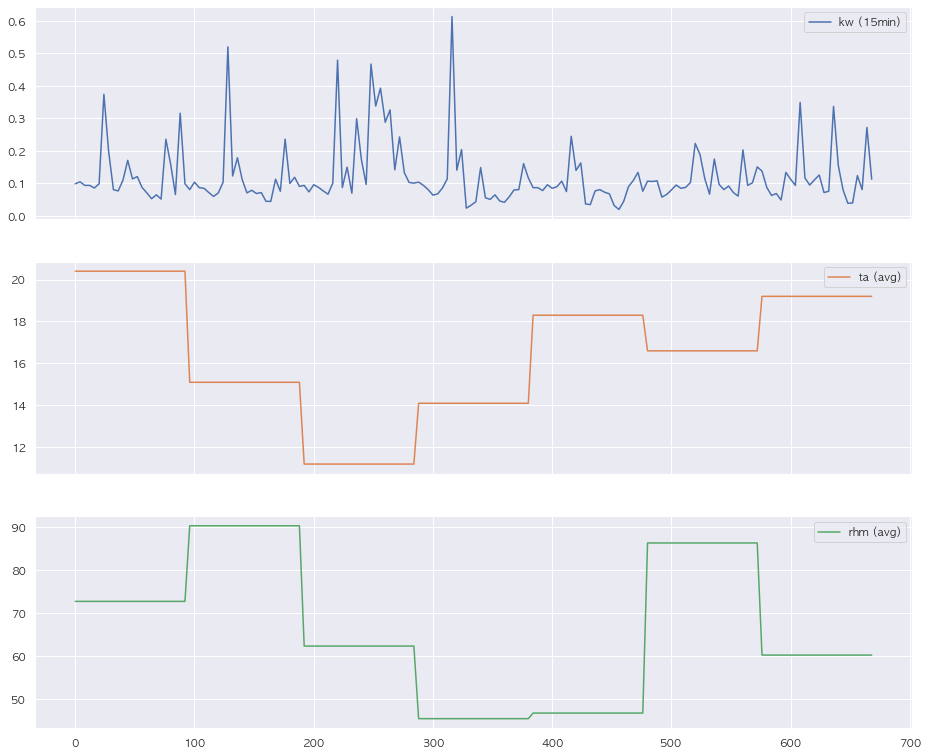

In [153]:
plot_cols=['kw (15min)', 'ta (avg)', 'rhm (avg)']
plot_features = hh_datas[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = hh_datas[plot_cols][:168]
plot_features = hh_datas[:168]
_ = plot_features.plot(subplots=True)

In [154]:
df = hh_datas.copy()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kw (15min),8760.0,0.097879,0.100737,0.005,0.043,0.068,0.104,0.921
ta (avg),8760.0,13.310959,10.734012,-10.500,4.900,12.700,22.400,33.700
rhm (avg),8760.0,56.476164,15.526030,24.300,46.100,55.100,66.900,97.000


In [155]:
timestamp_s = date_time.map(dt.timestamp)

Text(0.5, 1.0, 'Time of day signal')

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


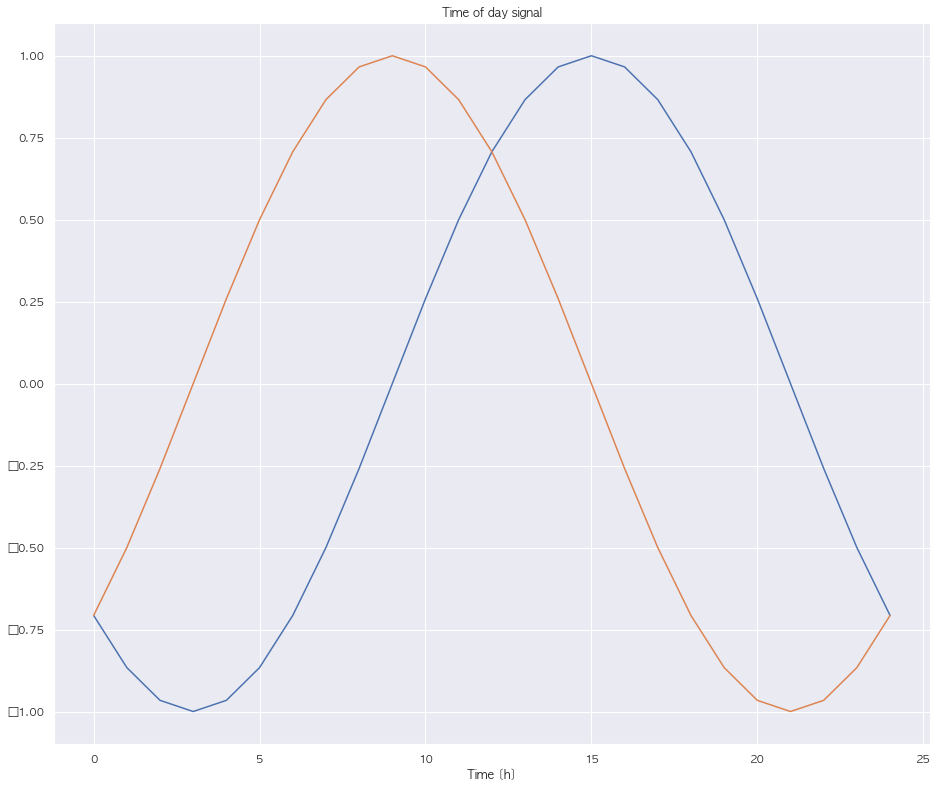

In [156]:
day = 24*60*60
week = 7*day
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
df['Week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of week signal')

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


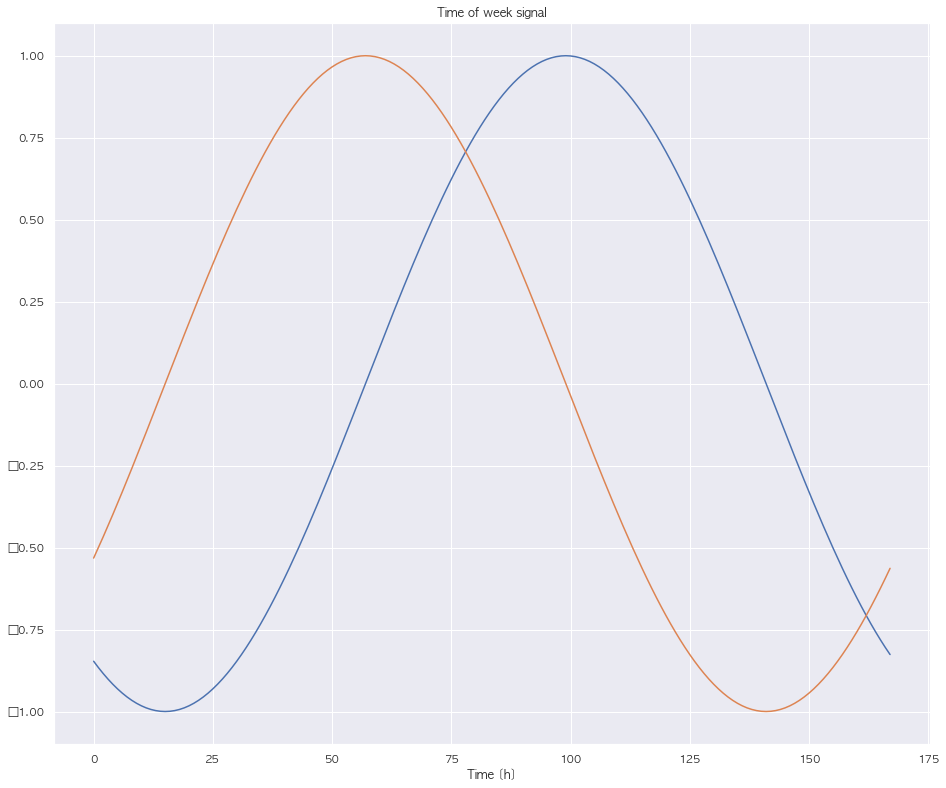

In [157]:
plt.plot(np.array(df['Week sin'])[:168])
plt.plot(np.array(df['Week cos'])[:168])
plt.xlabel('Time [h]')
plt.title('Time of week signal')

Text(0.5, 1.0, 'Time of week signal')

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


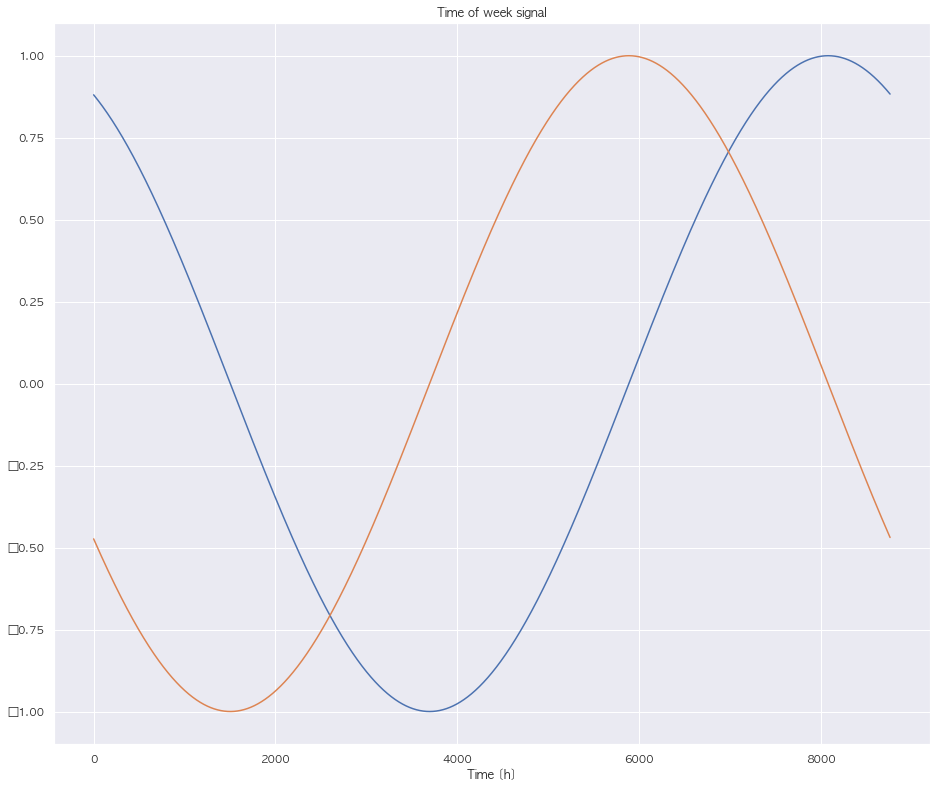

In [158]:
plt.plot(np.array(df['Year sin']))
plt.plot(np.array(df['Year cos']))
plt.xlabel('Time [h]')
plt.title('Time of week signal')

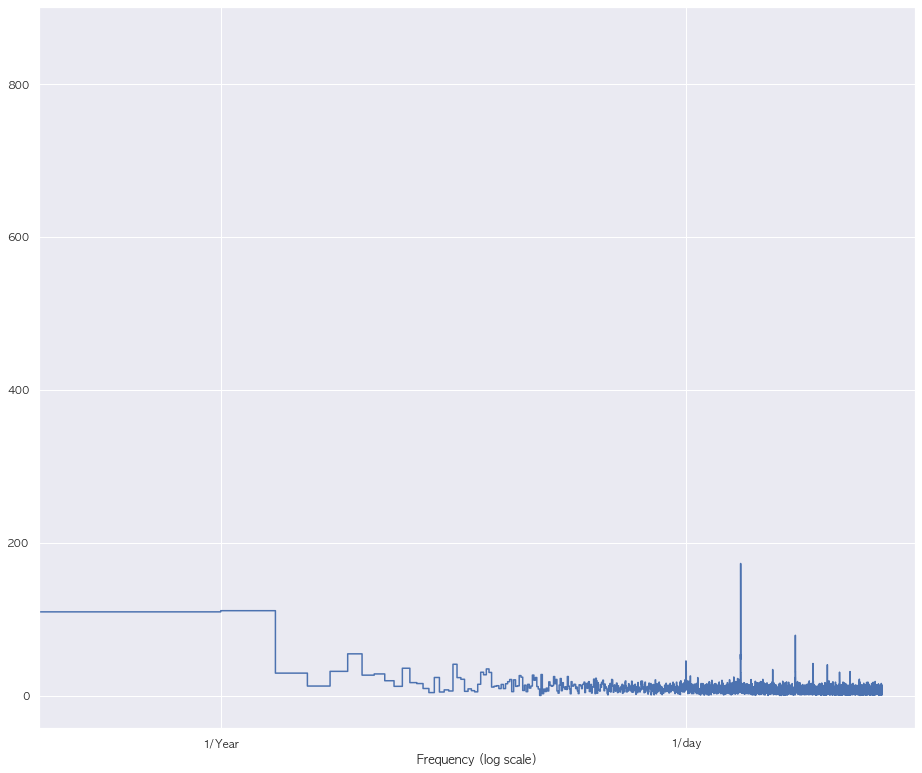

In [159]:
fft = tf.signal.rfft(df['kw (15min)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['kw (15min)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [160]:
df

,kw (15min),ta (avg),rhm (avg),Day sin,Day cos,Week sin,Week cos,Year sin,Year cos
0,0.099,20.4,72.8,-7.071068e-01,-7.071068e-01,-0.846724,-0.532032,0.880785,-0.473516
4,0.105,20.4,72.8,-8.660254e-01,-5.000000e-01,-0.866025,-0.500000,0.880445,-0.474148
8,0.094,20.4,72.8,-9.659258e-01,-2.588190e-01,-0.884115,-0.467269,0.880105,-0.474779
12,0.094,20.4,72.8,-1.000000e+00,-7.870816e-12,-0.900969,-0.433884,0.879765,-0.475409
16,0.086,20.4,72.8,-9.659258e-01,2.588190e-01,-0.916562,-0.399892,0.879424,-0.476040
...,...,...,...,...,...,...,...,...,...
35020,0.116,15.5,52.8,5.000000e-01,-8.660254e-01,-0.988831,0.149042,0.884431,-0.466671
35024,0.045,15.5,52.8,2.588190e-01,-9.659258e-01,-0.982566,0.185912,0.884096,-0.467305
35028,0.050,15.5,52.8,7.947720e-12,-1.000000e+00,-0.974928,0.222521,0.883761,-0.467939
35032,0.030,15.5,52.8,-2.588190e-01,-9.659258e-01,-0.965926,0.258819,0.883425,-0.468572


In [161]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
df.shape # 9개의 특성을 가진 데이터가 8760 개

(8760, 9)

In [162]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


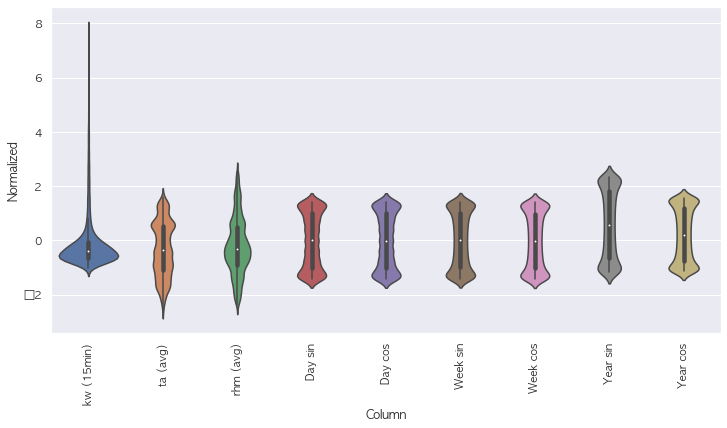

In [163]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [164]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [165]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['kw (15min)'])
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['kw (15min)'])

In [166]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [167]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
labels shape: (3, 1, 1)


In [168]:
np.array(train_df[100:100+w2.total_window_size])

array([[-2.36518195e-01,  1.57683417e-01, -8.56641009e-01,
        -1.36451368e+00,  3.64920227e-01,  1.41989735e+00,
        -6.31961607e-02,  2.06959874e+00, -5.09356114e-01],
       [-1.88821909e-01,  1.57683417e-01, -8.56641009e-01,
        -1.22324453e+00,  7.05973989e-01,  1.41693204e+00,
        -1.15999844e-01,  2.06892317e+00, -5.10178784e-01],
       [-2.66545386e-02,  1.57683417e-01, -8.56641009e-01,
        -9.98517766e-01,  9.98843494e-01,  1.41199448e+00,
        -1.68655722e-01,  2.06824684e+00, -5.11001080e-01],
       [-3.31910766e-01,  1.57683417e-01, -8.56641009e-01,
        -7.05648143e-01,  1.22357017e+00,  1.40509157e+00,
        -2.21090152e-01,  2.06756974e+00, -5.11823002e-01],
       [ 1.28976294e+00,  1.57683417e-01, -8.56641009e-01,
        -3.64594243e-01,  1.36483926e+00,  1.39623296e+00,
        -2.73229798e-01,  2.06689189e+00, -5.12644548e-01],
       [ 2.88140945e-01,  1.57683417e-01, -8.56641009e-01,
         1.40167345e-03,  1.41302352e+00,  1.385431

In [169]:
w2.example = example_inputs, example_labels

In [177]:
def plot(self, model=None, plot_col='kw (15min)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

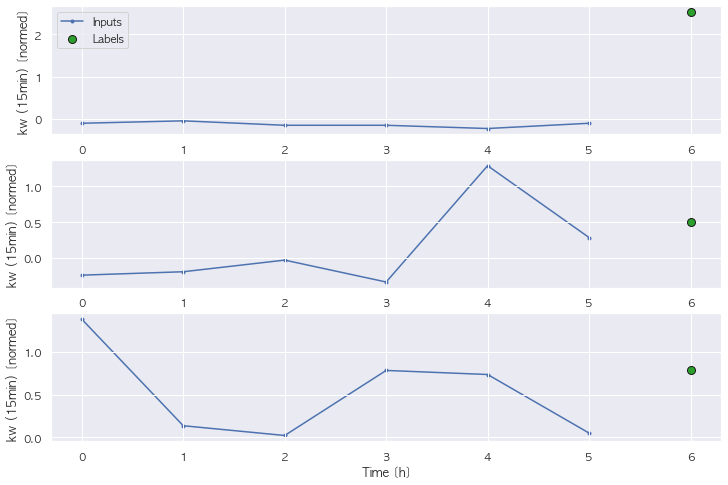

In [178]:
w2.plot()

In [179]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [180]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [181]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['kw (15min)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['kw (15min)']

In [182]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [183]:
baseline = Baseline(label_index=column_indices['kw (15min)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

55/55 [==============================] - 0s 1ms/step - loss: 0.7025 - mean_absolute_error: 0.3857


In [184]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['kw (15min)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['kw (15min)']

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


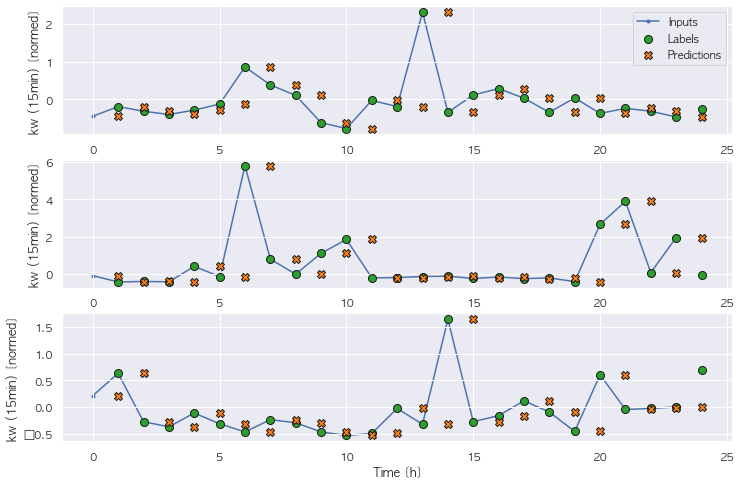

In [185]:
wide_window.plot(baseline)

In [186]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [187]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [188]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 2.9698 - mean_absolute_error: 1.3558 - val_loss: 1.9759 - val_mean_absolute_error: 1.1256
Epoch 2/20
192/192 [==============================] - 0s 1ms/step - loss: 1.9880 - mean_absolute_error: 1.0608 - val_loss: 1.4525 - val_mean_absolute_error: 0.9565
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 1.4434 - mean_absolute_error: 0.8523 - val_loss: 1.1189 - val_mean_absolute_error: 0.8280
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 1.1606 - mean_absolute_error: 0.7178 - val_loss: 0.9208 - val_mean_absolute_error: 0.7412
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 1.0220 - mean_absolute_error: 0.6386 - val_loss: 0.8103 - val_mean_absolute_error: 0.6899
Epoch 6/20
192/192 [==============================] - 0s 1ms/step - loss: 0.9576 - mean_absolute_error: 0.5977 - val_loss: 0.7547 - val_mean_absolute_error: 0.6637
Epoch 7/20
192/1

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


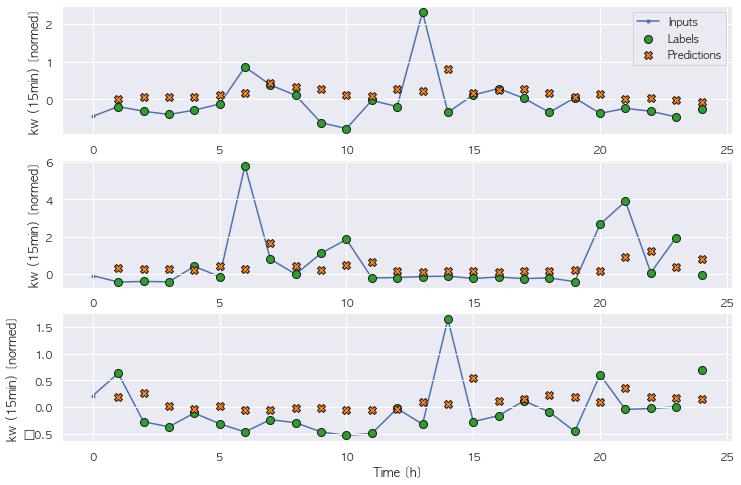

In [189]:
wide_window.plot(linear)

In [190]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 0.8794 - mean_absolute_error: 0.5628 - val_loss: 0.7151 - val_mean_absolute_error: 0.6471
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.8250 - mean_absolute_error: 0.5502 - val_loss: 0.8246 - val_mean_absolute_error: 0.7176
Epoch 3/20
55/55 [==============================] - 0s 801us/step - loss: 0.7246 - mean_absolute_error: 0.6256


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


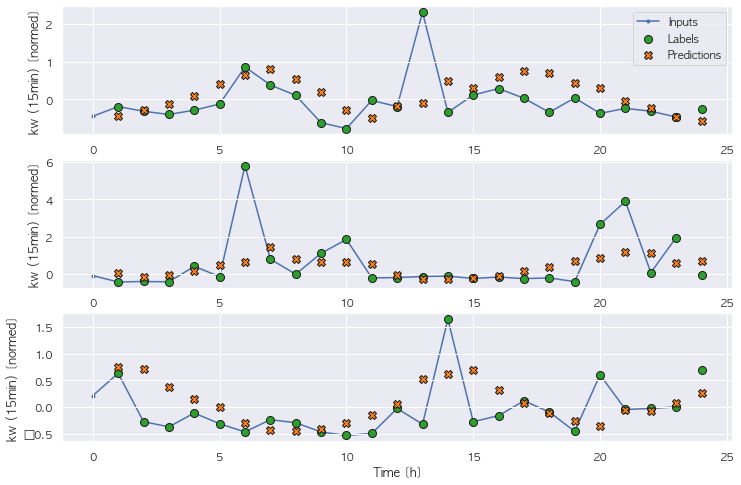

In [194]:
wide_window.plot(dense)